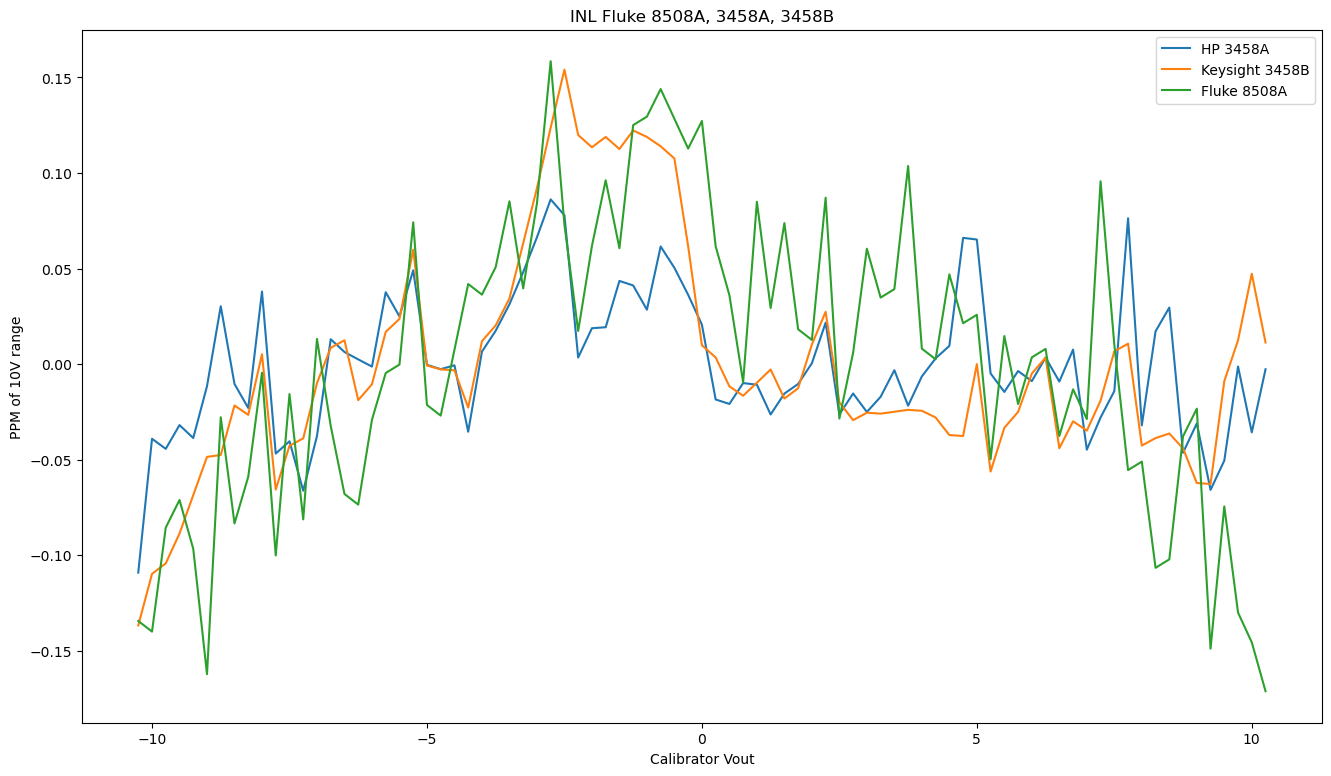

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Array from .csv

arra=np.genfromtxt('https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/20240721-195723_REPS5700A_3458A_3458B_8508A_INL.csv',delimiter=',',skip_header=1)

# Columns to lists
F5700A = [col[0] for col in arra]
HP3458A = [col[1] for col in arra]
K3458B = [col[2] for col in arra]
F8508A = [col[3] for col in arra]
PPMdeviationa = [(F5700A[x]-HP3458A[x])/(10/1000000) for x in range(len(HP3458A))]

figa, axa = plt.subplots()
#axa.plot(F5700A, PPMdeviationa, label='absolute')
axa.set_xlabel('Calibrator Vout')
axa.set_ylabel('PPM of 10V range')
axa.set_title("INL Fluke 8508A, 3458A, 3458B")
figa.set_size_inches(16, 9)
figa.patch.set_facecolor('white')


# Fit a polynomial function of degree 1
termsa = np.polyfit(F5700A, PPMdeviationa, 1)

# Create a function with the terms we just generated
polyfunctiona = np.poly1d(termsa)

bestfita = [PPMdeviationa[x]-polyfunctiona(F5700A[x]) for x in range(len(HP3458A))]

# Plot a little test
axa.plot(F5700A, bestfita, label='HP 3458A')


#####################

PPMdeviationa = [(F5700A[x]-K3458B[x])/(10/1000000) for x in range(len(K3458B))]
termsa = np.polyfit(F5700A, PPMdeviationa, 1)
polyfunctiona = np.poly1d(termsa)
bestfita = [PPMdeviationa[x]-polyfunctiona(F5700A[x]) for x in range(len(K3458B))]
axa.plot(F5700A, bestfita, label='Keysight 3458B')
#####################

#####################
PPMdeviationa = [(F5700A[x]-F8508A[x])/(10/1000000) for x in range(len(F8508A))]
termsa = np.polyfit(F5700A, PPMdeviationa, 1)
polyfunctiona = np.poly1d(termsa)
bestfita = [PPMdeviationa[x]-polyfunctiona(F5700A[x]) for x in range(len(F8508A))]
axa.plot(F5700A, bestfita, label='Fluke 8508A')
#####################

axa.legend()